# M. Hamza Mehmood Zaidi
# 2022379
# Data Science
# Assignment No. 4

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("forestfires.csv")

# Display the first few rows of the dataset
df.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['month', 'day'])

# Display the first few rows of the encoded dataset
df_encoded.head()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,False,False,False,True,False,False,False,False,False,False
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,False,True,False,False,False,True,False,False,False,False
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,False,False,False,True,False,False,False,False,False,False
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['size_category'])  # Features
y = df_encoded['size_category']  # Target variable

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (517, 47)
Shape of y: (517,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the unique classes and their encoded values
print("Encoded classes:", label_encoder.classes_)
print("Encoded values:", set(y_encoded))

Encoded classes: ['large' 'small']
Encoded values: {0, 1}


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the number of features
n_features = X_train.shape[1]

# Initialize the model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=50, input_shape=(1, n_features)))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                19600     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 19651 (76.76 KB)
Trainable params: 19651 (76.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", len(y_train))
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", len(y_test))


Shape of X_train: (413, 47)
Shape of y_train: 413
Shape of X_test: (104, 47)
Shape of y_test: 104


In [ ]:
import numpy as np

# Convert the input data to float32
X_train_reshaped = np.array(X_train).astype('float32')
X_test_reshaped = np.array(X_test).astype('float32')

# Reshape data for LSTM input
X_train_reshaped = X_train_reshaped.reshape((X_train_reshaped.shape[0], 1, X_train_reshaped.shape[1]))
X_test_reshaped = X_test_reshaped.reshape((X_test_reshaped.shape[0], 1, X_test_reshaped.shape[1]))

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
11/11 [==============================] - 3s 62ms/step - loss: 0.6238 - accuracy: 0.7121 - val_loss: 0.5356 - val_accuracy: 0.7952
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5677 - accuracy: 0.7333 - val_loss: 0.5192 - val_accuracy: 0.7831
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5552 - accuracy: 0.7394 - val_loss: 0.5096 - val_accuracy: 0.7711
Epoch 4/50
11/11 [==============================] - 0s 9ms/step - loss: 0.5434 - accuracy: 0.7303 - val_loss: 0.5000 - val_accuracy: 0.7711
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5136 - accuracy: 0.7394 - val_loss: 0.4808 - val_accuracy: 0.7831
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4967 - accuracy: 0.7455 - val_loss: 0.4688 - val_accuracy: 0.7831
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4763 - accuracy: 0.7758 - val_loss: 0.4382 - val_accuracy: 0.8193
Epoch 8/50
11/11 [=

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


4/4 [==============================] - 0s 4ms/step - loss: 0.1231 - accuracy: 0.9615
Test Loss: 0.12306220084428787
Test Accuracy: 0.9615384340286255


In [ ]:
# Make predictions on test data
y_pred = model.predict(X_test_reshaped)

# Convert predictions to binary classes (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Convert predicted classes back to original labels
predicted_labels = label_encoder.inverse_transform(y_pred_classes.flatten())

# Display some sample predictions
print("Sample Predictions:")
for i in range(50):
    print("Predicted:", predicted_labels[i], "| True:", label_encoder.inverse_transform([y_test[i]]))


4/4 [==============================] - 0s 4ms/step
Sample Predictions:
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: large | True: ['large']
Predicted: large | True: ['large']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: large | True: ['large']
Predicted: large | True: ['large']
Predicted: large | True: ['large']
Predicted: large | True: ['large']
Predicted: large | True: ['large']
Predicted: large | True: ['large']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | 

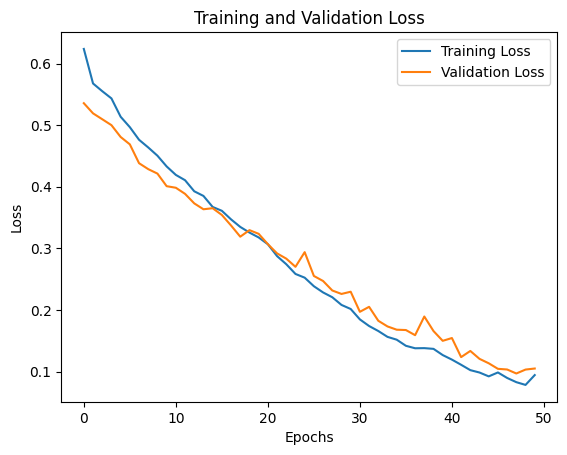

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


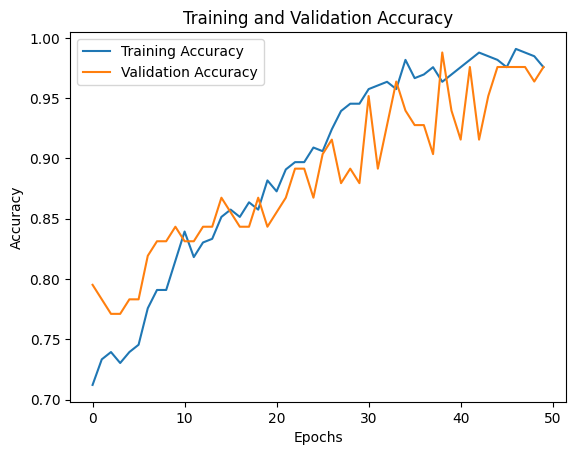

In [ ]:
# Get training and validation accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


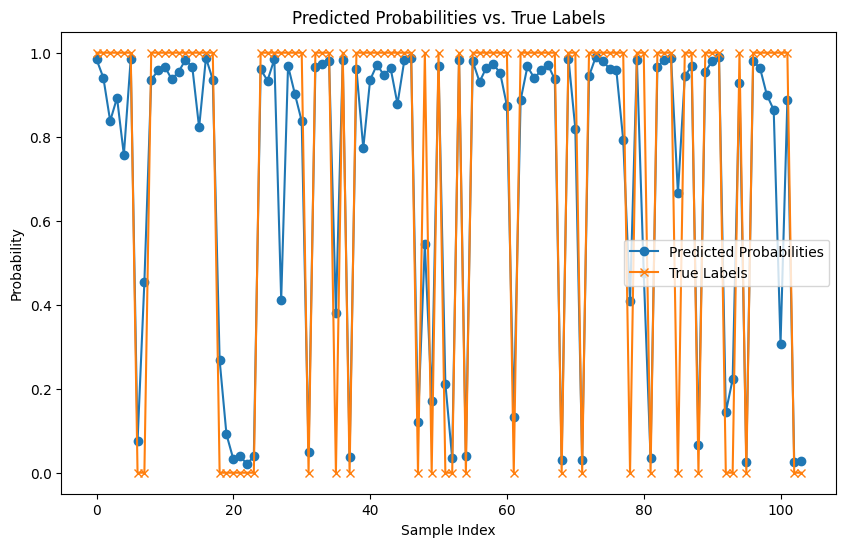

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted probabilities and true labels
plt.figure(figsize=(10, 6))
plt.plot(y_pred.flatten(), label='Predicted Probabilities', marker='o')
plt.plot(y_test, label='True Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Probability')
plt.title('Predicted Probabilities vs. True Labels')
plt.legend()
plt.show()
